In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train =pd.read_csv("train.csv")

In [2]:
pd.set_option("display.max_columns",90)

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<h2> Finding numerical columns and columns with nan values </h2>

In [5]:
numerical_feature=[]
for feature in train.columns:
    if train[feature].dtype !='O':
        numerical_feature.append(feature)
len(numerical_feature)

38

In [6]:
features_with_nan=[feature for feature in train.columns if train[feature].isnull().sum()>1]

for feature in features_with_nan:
    print(feature, np.around(train[feature].isnull().sum()/len(train[feature]),4), "% missing")

LotFrontage 0.1774 % missing
Alley 0.9377 % missing
MasVnrType 0.0055 % missing
MasVnrArea 0.0055 % missing
BsmtQual 0.0253 % missing
BsmtCond 0.0253 % missing
BsmtExposure 0.026 % missing
BsmtFinType1 0.0253 % missing
BsmtFinType2 0.026 % missing
FireplaceQu 0.4726 % missing
GarageType 0.0555 % missing
GarageYrBlt 0.0555 % missing
GarageFinish 0.0555 % missing
GarageQual 0.0555 % missing
GarageCond 0.0555 % missing
PoolQC 0.9952 % missing
Fence 0.8075 % missing
MiscFeature 0.963 % missing


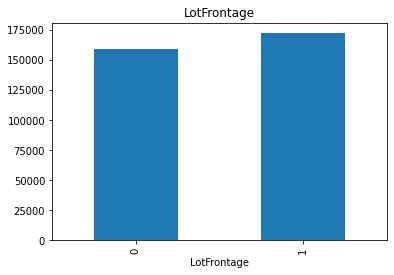

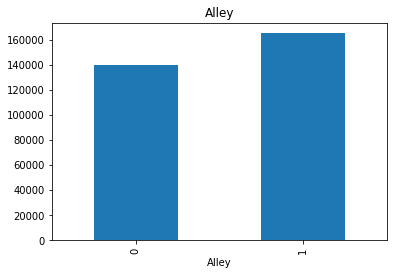

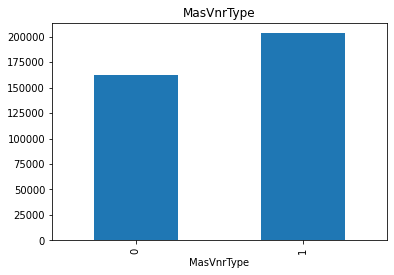

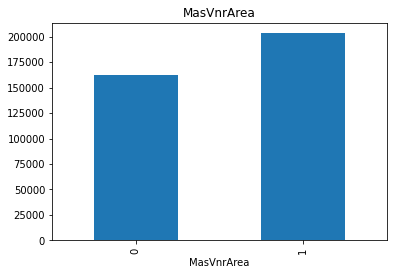

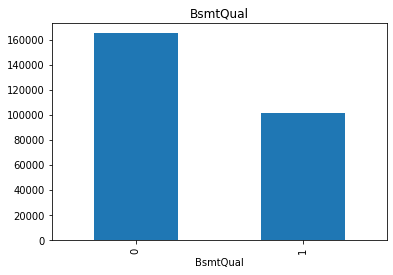

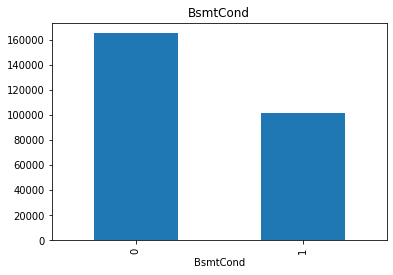

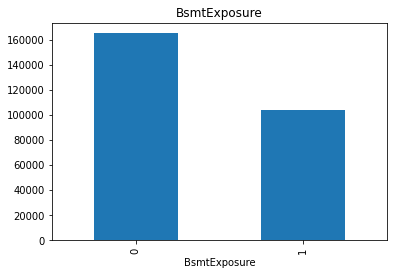

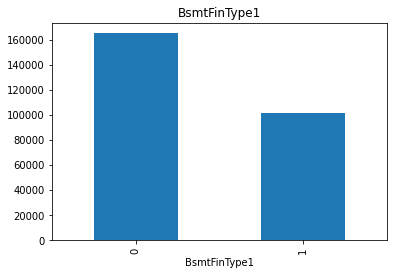

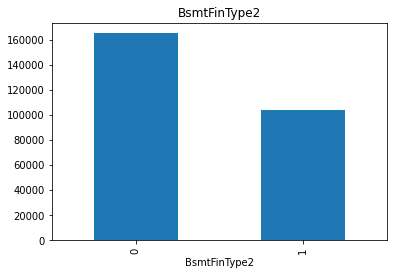

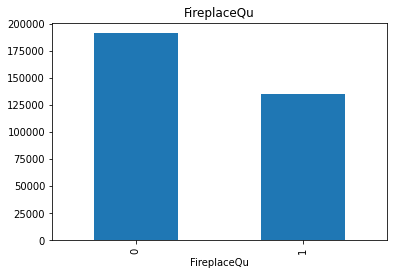

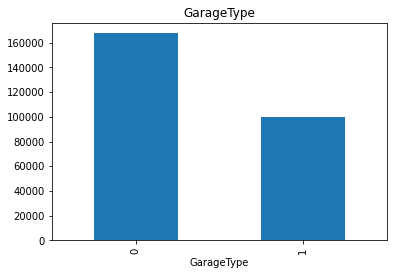

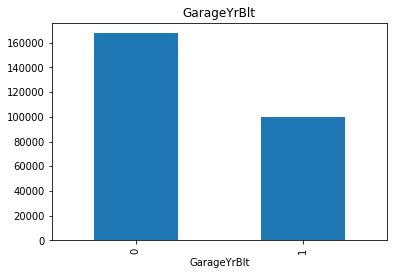

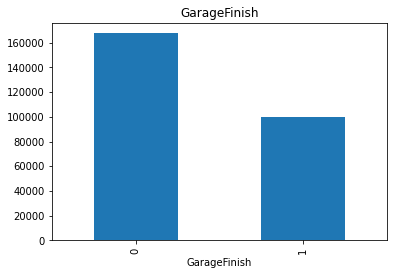

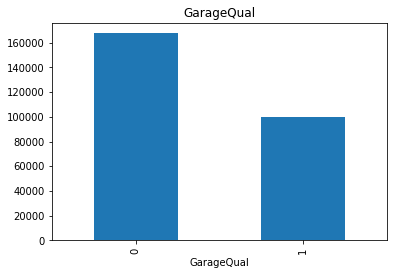

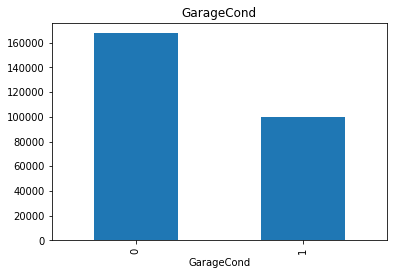

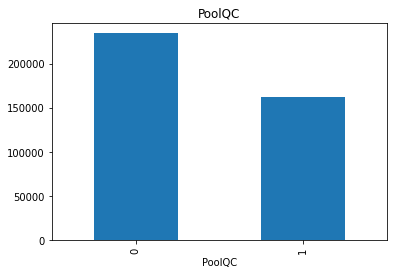

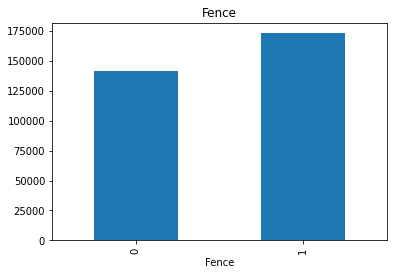

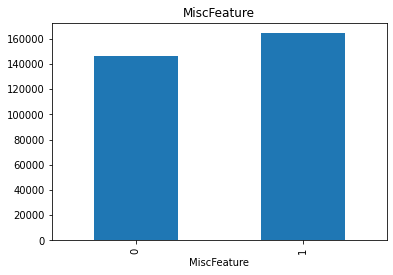

In [7]:
for feature in features_with_nan:
    data = train.copy()
    data[feature] = np.where(data[feature].isnull(),1,0)
    #replacing nan by 1
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

<h2>Finding columns with discrete values </h2>

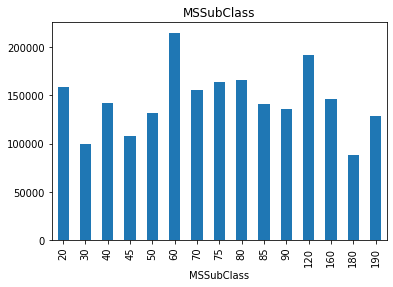

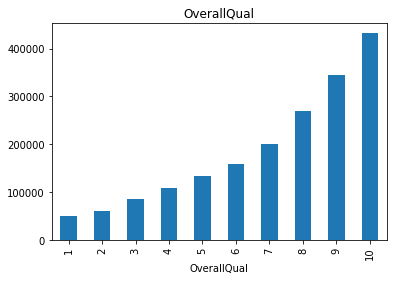

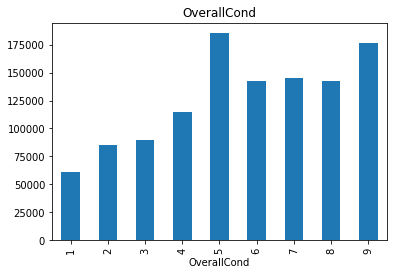

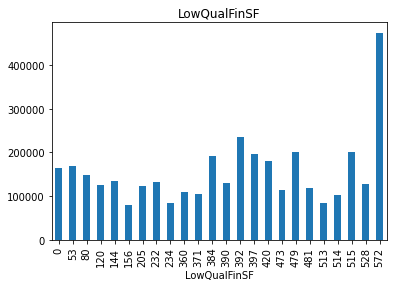

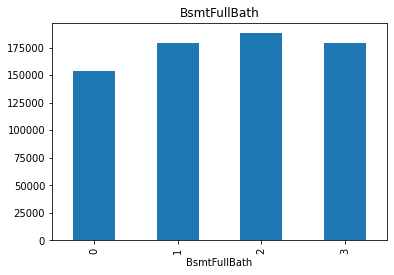

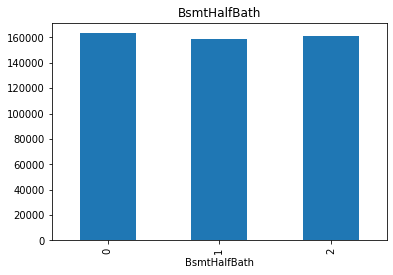

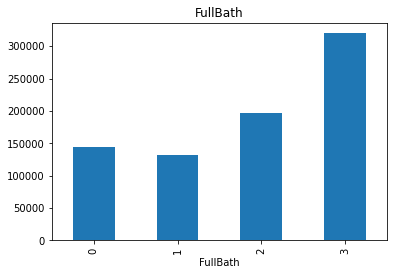

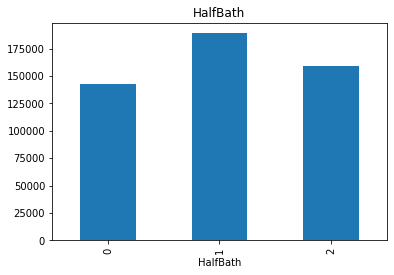

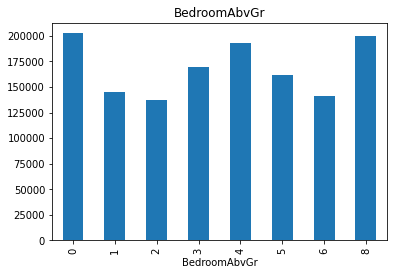

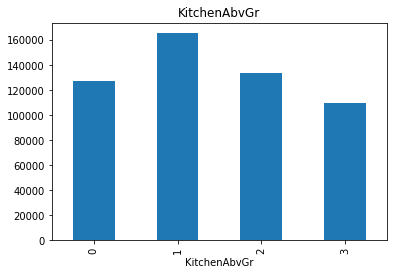

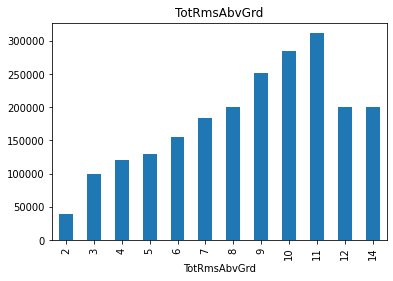

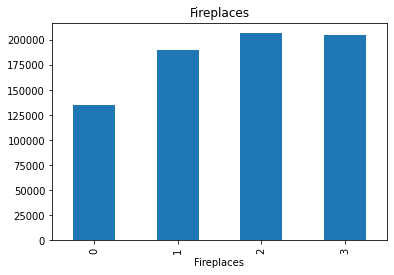

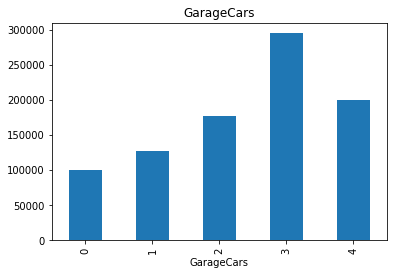

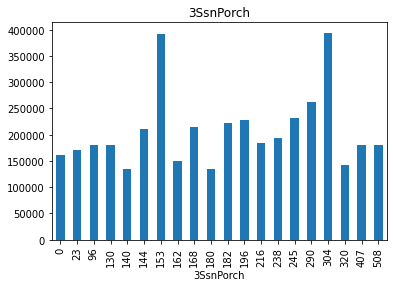

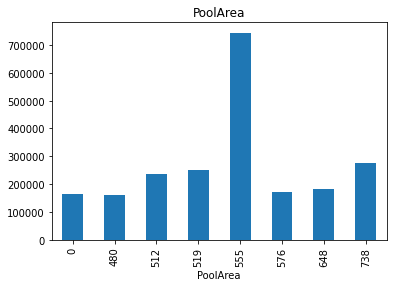

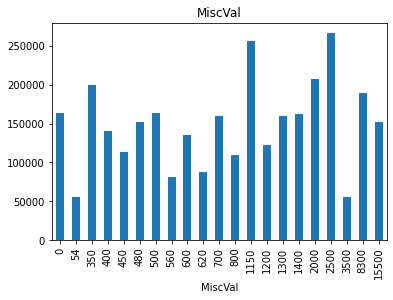

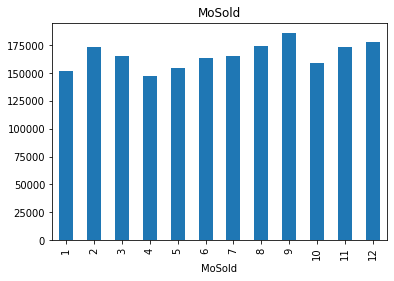

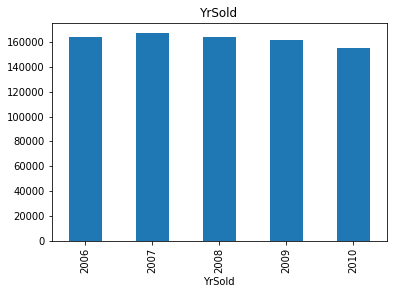

In [8]:
discrete_var = [feature for feature in numerical_feature if len(train[feature].unique())<25 ]
for feature in discrete_var:
    data = train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

Text(0.5, 1.0, 'YrSold')

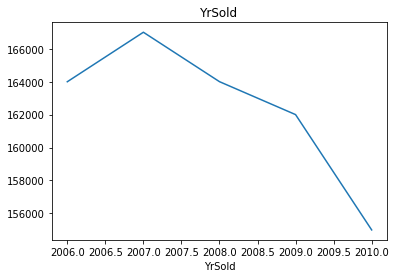

In [9]:
year_var = [feature for feature in numerical_feature if 'Year' in feature or 'Yr' in feature]
data = train.copy()
data.groupby('YrSold')['SalePrice'].median().plot()
plt.title('YrSold')

In [10]:
for i in year_var:
    print(data[i].unique())
    

[2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
[2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930

<h2>Continuous value columns </h2>

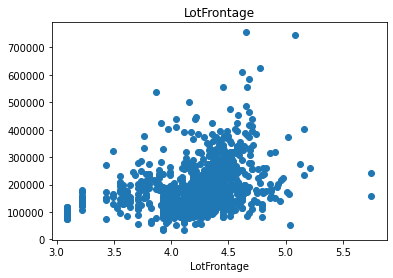

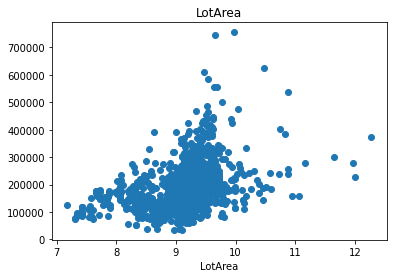

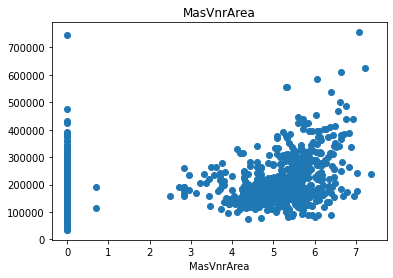

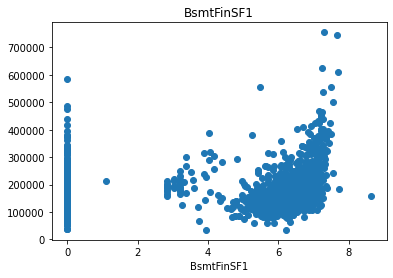

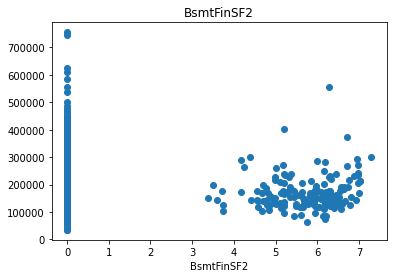

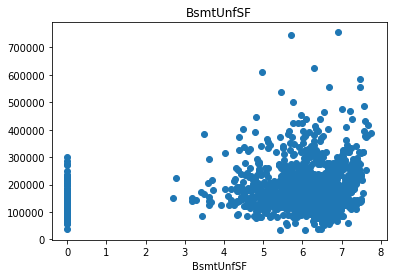

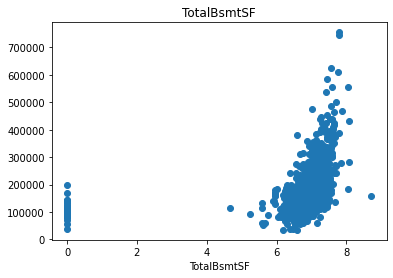

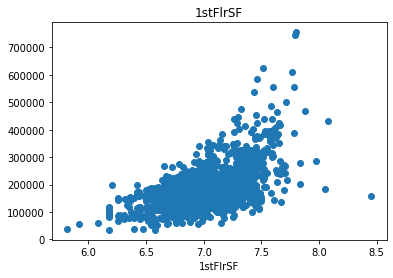

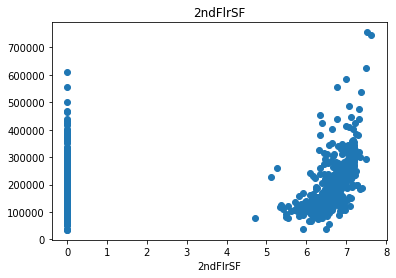

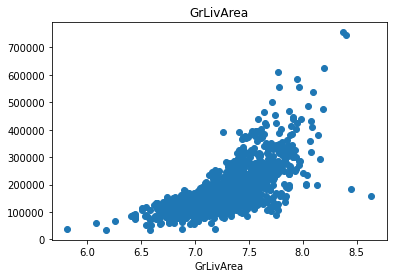

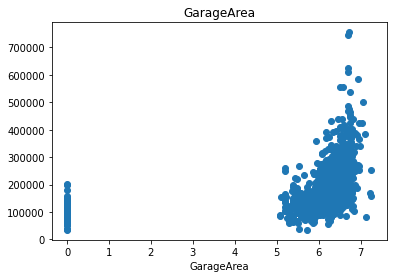

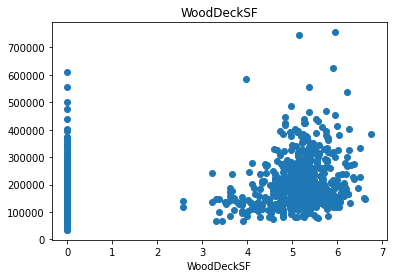

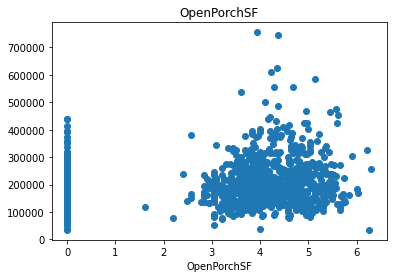

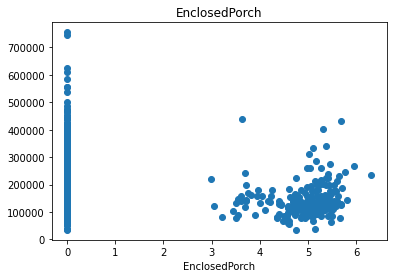

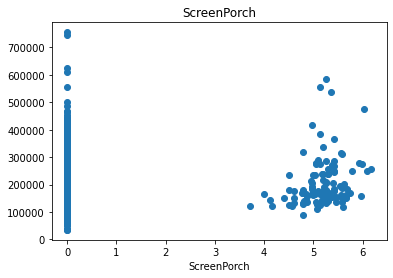

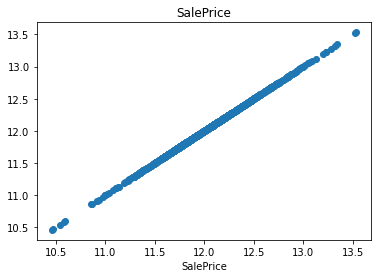

In [37]:
continuous_var = [feature for feature in numerical_feature if feature not in year_var and feature not in discrete_var ]
continuous_var.remove('Id')

for feature in continuous_var:
    data = train.copy()
    data[feature].fillna(data[feature].mean())
    data[feature] = np.log1p(data[feature])
    plt.scatter(data[feature],data['SalePrice'])
    plt.title(feature)
    plt.xlabel(feature)
    plt.show()


In the graphs above we observe a monotonic relation as the feature value increases the SalePrice also increases

<h2> Analysing year columns </h2>

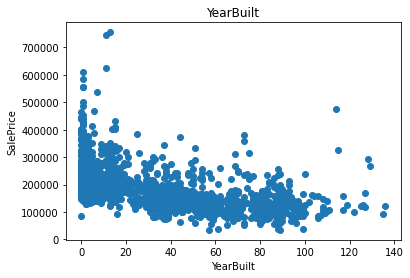

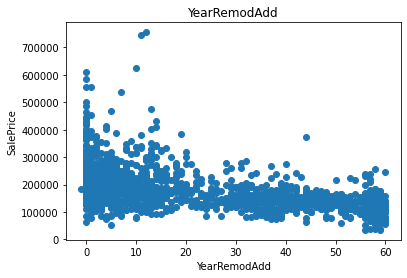

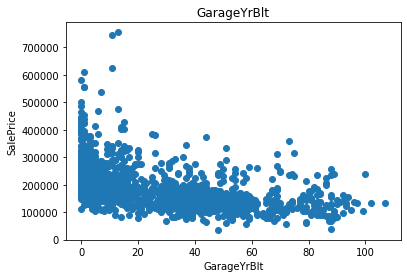

In [40]:
for feature in year_var:
    if feature != 'YrSold':
        data = train.copy()
        data[feature] = data['YrSold']-data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.title(feature)
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

Here we observed that the lesser the difference between YrSold and other Year features the higher is the saleprice

<h2>outliers</h2>

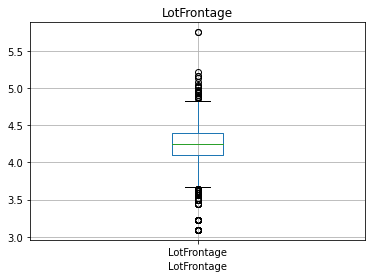

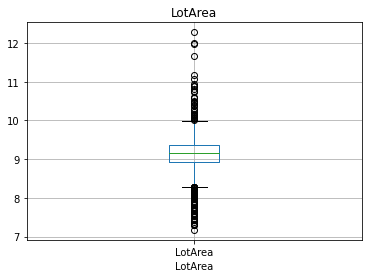

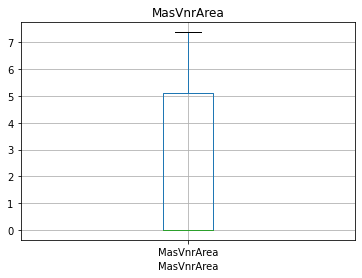

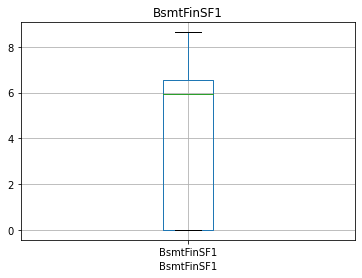

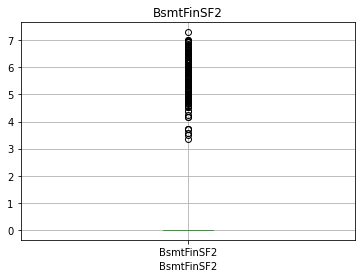

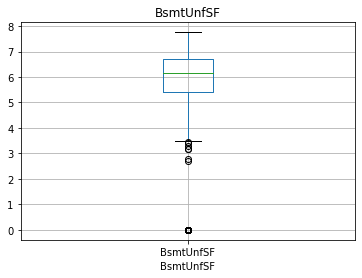

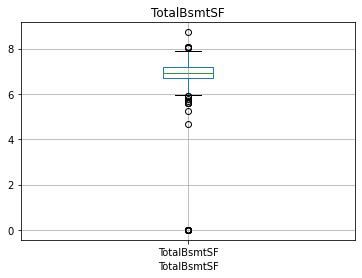

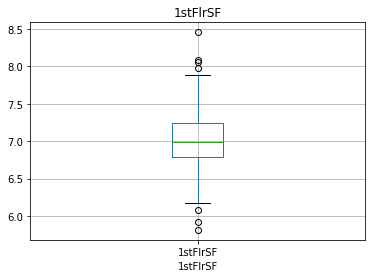

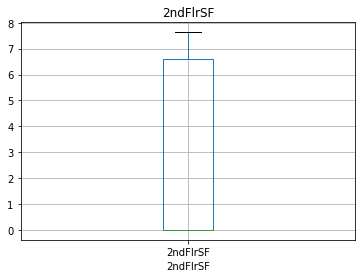

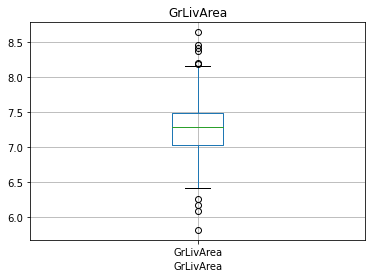

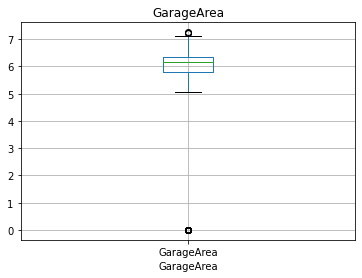

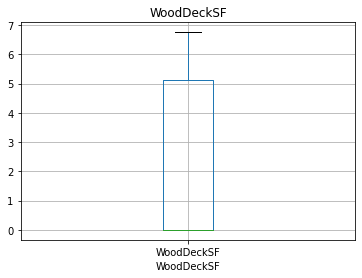

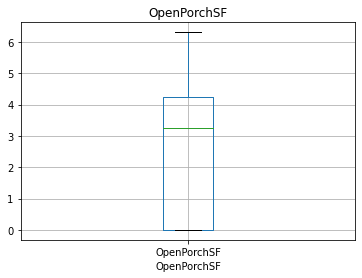

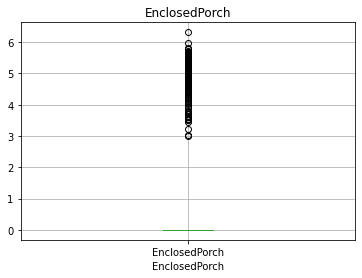

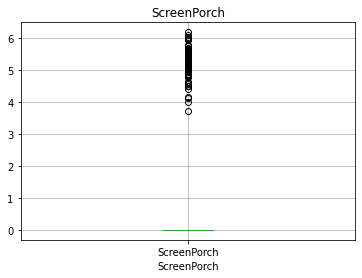

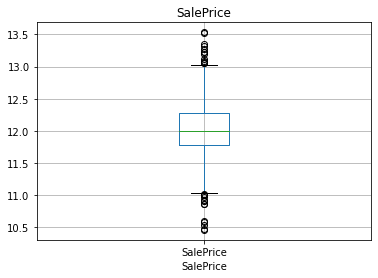

In [51]:
for feature in continuous_var:
    data = train.copy()
    data[feature].fillna(data[feature].mean())
    data[feature] = np.log1p(data[feature])
    data.boxplot(column=feature)
    plt.title(feature)
    plt.xlabel(feature)
    plt.show()

<h2>Finding and analysing Categorical Features </h2>

In [47]:
categorical_features = [feature for feature in train.columns if train[feature].dtype=='O']

#finding number of categories in each categorical column

for feature in categorical_features:
    print(f"{feature} has {data[feature].nunique()} unique categories")

MSZoning has 5 unique categories
Street has 2 unique categories
Alley has 2 unique categories
LotShape has 4 unique categories
LandContour has 4 unique categories
Utilities has 2 unique categories
LotConfig has 5 unique categories
LandSlope has 3 unique categories
Neighborhood has 25 unique categories
Condition1 has 9 unique categories
Condition2 has 8 unique categories
BldgType has 5 unique categories
HouseStyle has 8 unique categories
RoofStyle has 6 unique categories
RoofMatl has 8 unique categories
Exterior1st has 15 unique categories
Exterior2nd has 16 unique categories
MasVnrType has 4 unique categories
ExterQual has 4 unique categories
ExterCond has 5 unique categories
Foundation has 6 unique categories
BsmtQual has 4 unique categories
BsmtCond has 4 unique categories
BsmtExposure has 4 unique categories
BsmtFinType1 has 6 unique categories
BsmtFinType2 has 6 unique categories
Heating has 6 unique categories
HeatingQC has 5 unique categories
CentralAir has 2 unique categories
El

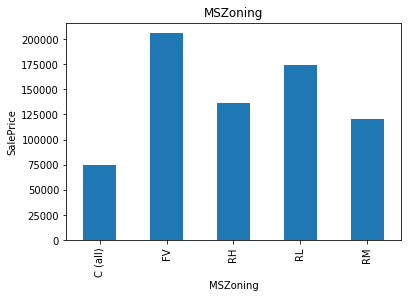

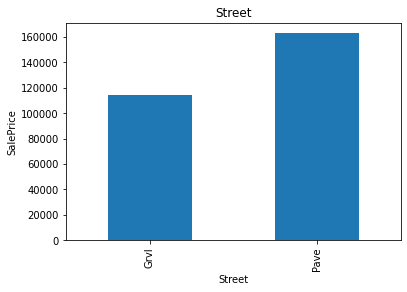

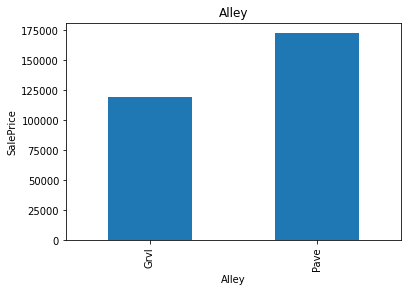

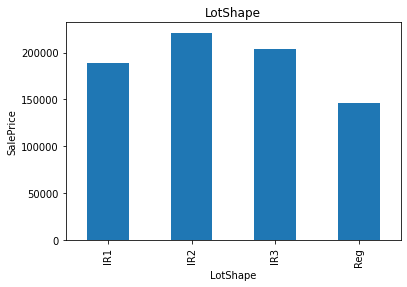

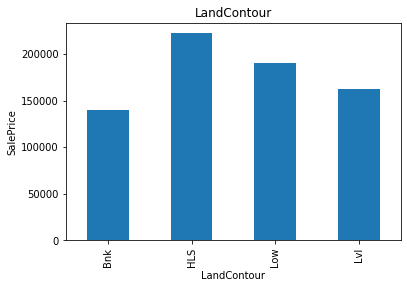

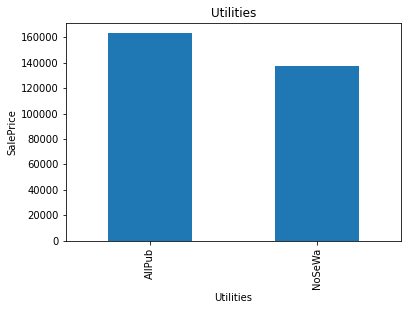

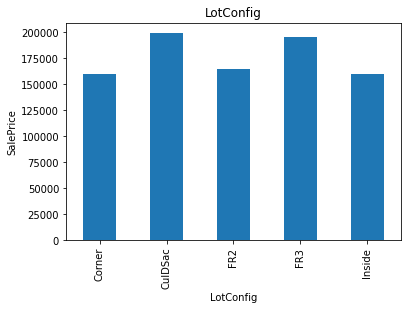

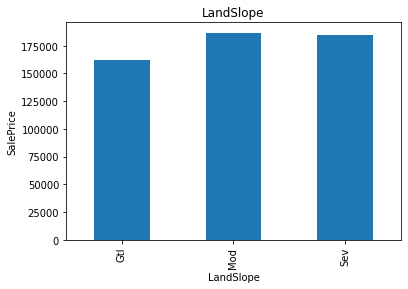

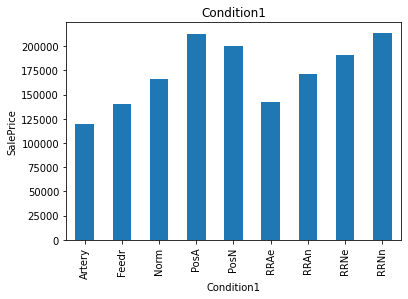

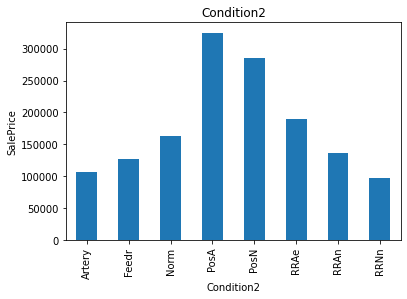

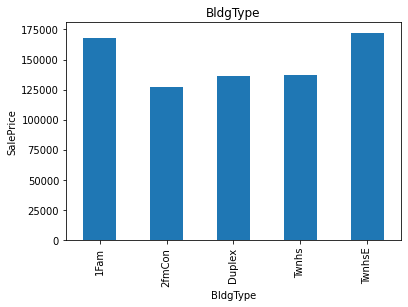

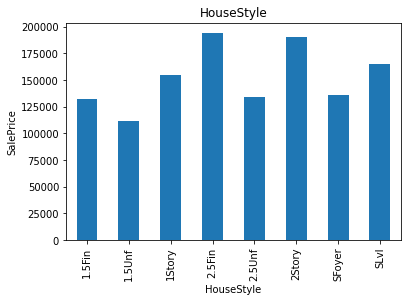

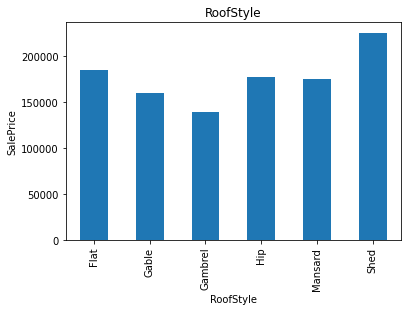

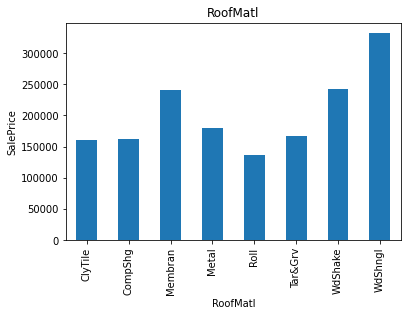

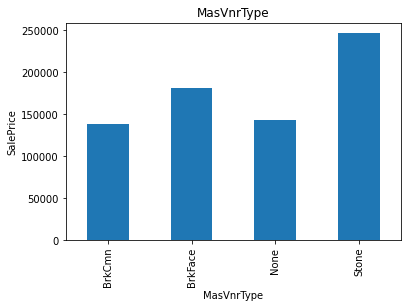

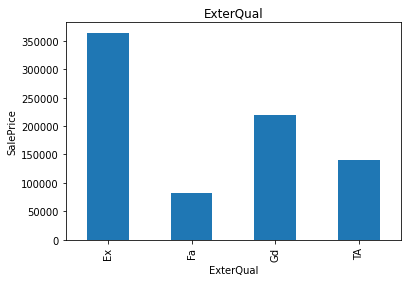

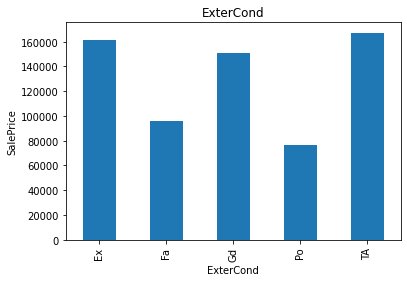

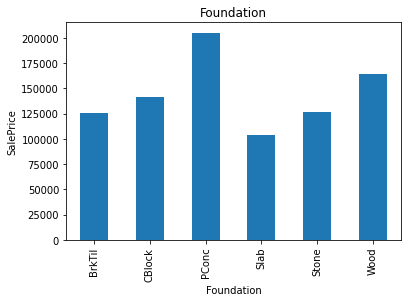

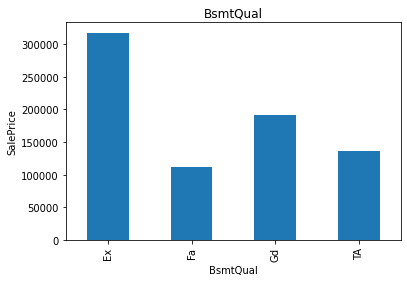

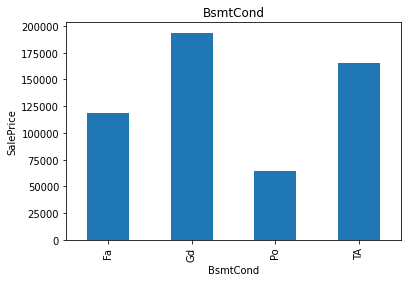

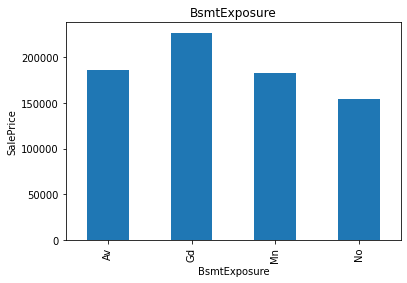

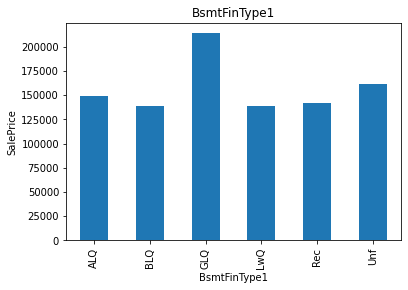

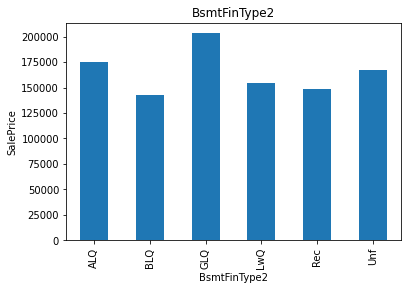

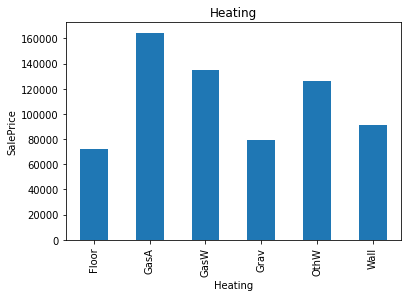

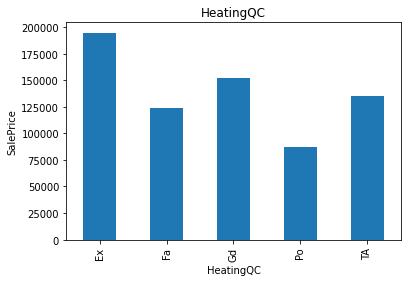

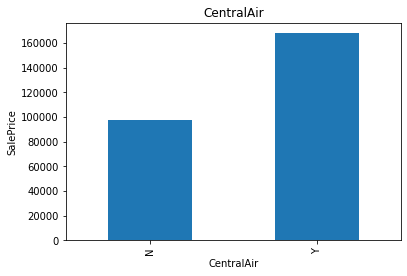

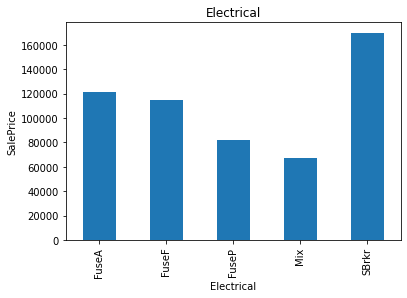

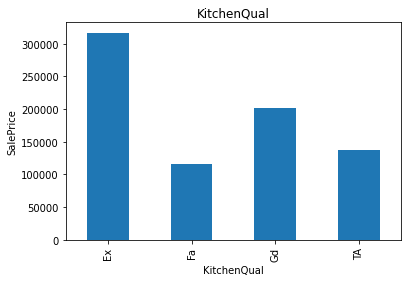

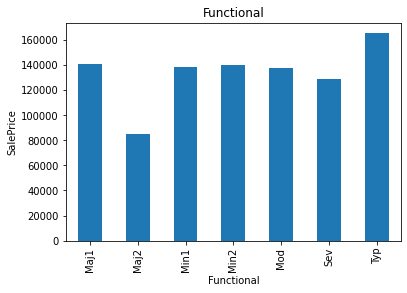

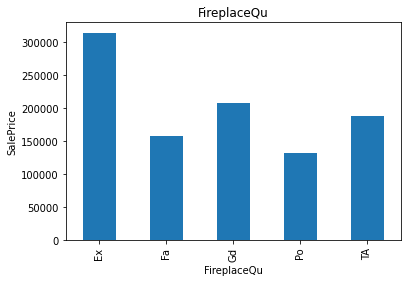

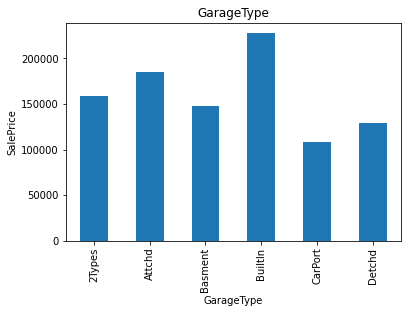

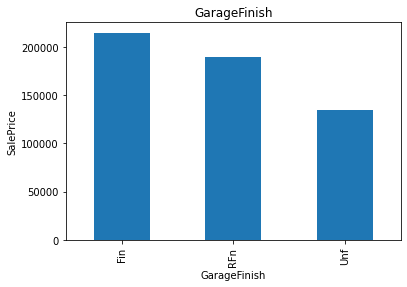

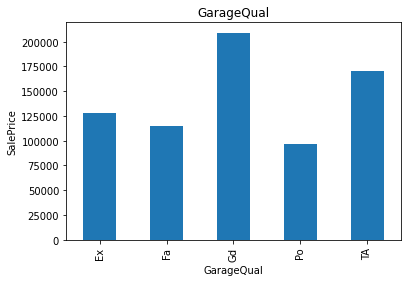

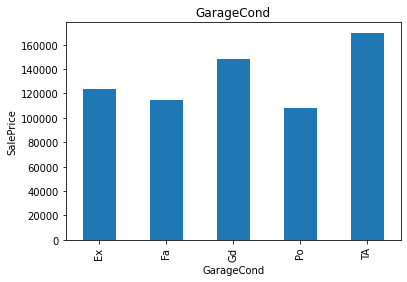

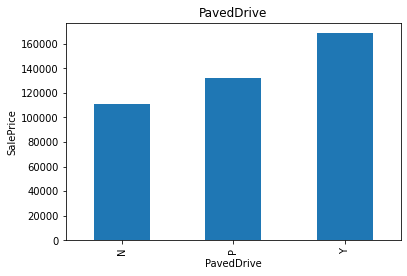

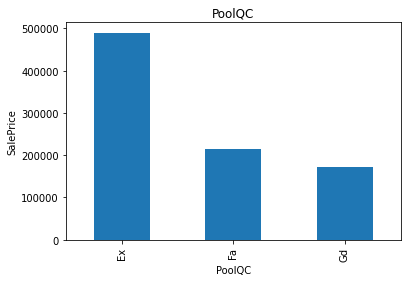

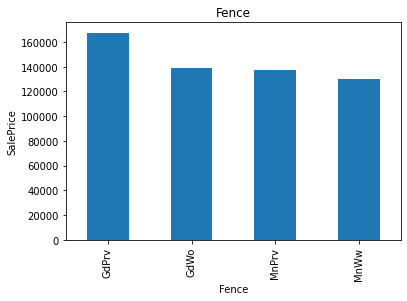

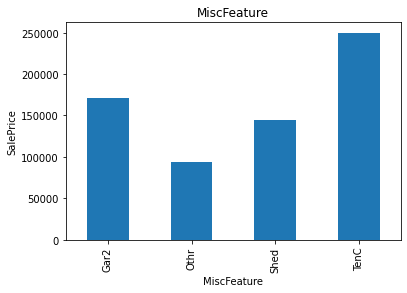

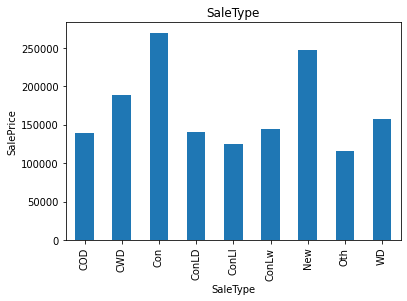

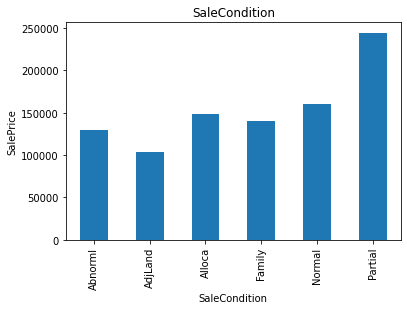

In [60]:
for feature in categorical_features:
    if data[feature].nunique()<15:
        data=train.copy()
        data.groupby(feature)['SalePrice'].median().plot.bar()
        plt.title(feature)
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

<h1>Feature Engineering</h1>
    <p>We will be doing the following:<p>
    <ol>
        <li>Finding Missing Values </li>
        <li>Filling Missing values </li>
        <li>Time features</li>
        <li>Creating dummies for categories </li>
    </ol>
    

In [64]:
cat_features_nan = [feature for feature in categorical_features if feature in features_with_nan]

#filling nan values with missing making it a new label
def fill_cat(train,nan_feature):
    data = train.copy()
    data[nan_feature] = data[nan_feature].fillna("Missing")
    return data
train = fill_cat(train,cat_features_nan)
train[cat_features_nan].head()

,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,Missing,BrkFace,Gd,TA,No,GLQ,Unf,Missing,Attchd,RFn,TA,TA,Missing,Missing,Missing
1,Missing,None,Gd,TA,Gd,ALQ,Unf,TA,Attchd,RFn,TA,TA,Missing,Missing,Missing
2,Missing,BrkFace,Gd,TA,Mn,GLQ,Unf,TA,Attchd,RFn,TA,TA,Missing,Missing,Missing
3,Missing,None,TA,Gd,No,ALQ,Unf,Gd,Detchd,Unf,TA,TA,Missing,Missing,Missing
4,Missing,BrkFace,Gd,TA,Av,GLQ,Unf,TA,Attchd,RFn,TA,TA,Missing,Missing,Missing


In [75]:
numerical_features_nan = [feature for feature in numerical_feature if feature in features_with_nan]

#Whenever there are many outliers fill nan in with either median or mode an not mean
for feature in numerical_features_nan:
    median = train[feature].median()
    
    train[feature+"_nan"]=np.where(train[feature].isnull(),1,0)
    train[feature].fillna(median,inplace=True)

In [77]:
train[numerical_features_nan].head()

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0


In [78]:
for feature in year_var:
    if feature != 'YrSold':
        train[feature] = train['YrSold']-train[feature]
train[year_var]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,2008
1,31,31,31.0,2007
2,7,6,7.0,2008
3,91,36,8.0,2006
4,8,8,8.0,2008
...,...,...,...,...
1455,8,7,8.0,2007
1456,32,22,32.0,2010
1457,69,4,69.0,2010
1458,60,14,60.0,2010


In [79]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,8,7,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,8.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,175000,0,0,0
1456,1457,20,RL,85.0,13175,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,32,22,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,32.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,Missing,MnPrv,Missing,0,2,2010,WD,Normal,210000,0,0,0
1457,1458,70,RL,66.0,9042,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,69,4,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,69.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,Missing,GdPrv,Shed,2500,5,2010,WD,Normal,266500,0,0,0
1458,1459,20,RL,68.0,97

In [83]:
train.to_csv("new_train.csv",index=False)

In [3]:
train = pd.read_csv("new_train.csv")

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0


In [23]:
num_features = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','1stFlrSF',
               '2ndFlrSF','GrLivArea','WoodDeckSF','OpenPorchSF']
for feature in num_features:
    train[feature] = np.log1p(train[feature])

In [26]:
train[num_features].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,WoodDeckSF,OpenPorchSF
0,4.189655,9.042040,5.283204,6.561031,5.017280,6.753438,6.751101,7.444833,0.000000,4.127134
1,4.394449,9.169623,0.000000,6.886532,5.652489,7.141245,0.000000,7.141245,5.700444,0.000000
2,4.234107,9.328212,5.093750,6.188264,6.075346,6.825460,6.765039,7.488294,0.000000,3.761200
3,4.110874,9.164401,0.000000,5.379897,6.293419,6.869014,6.629363,7.448916,0.000000,3.583519
4,4.442651,9.565284,5.860786,6.486161,6.196444,7.044033,6.960348,7.695758,5.262690,4.442651


In [32]:
categorical_features = [feature for feature in train.columns if train[feature].dtype=='O']

for feature in categorical_features:
    temp = train.groupby(feature)['SalePrice'].count()/len(train)
    temp_df = temp[temp>0.01].index
    train[feature] = np.where(train[feature].isin(temp_df),train[feature],"Rare_cat")

In [36]:
train[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Missing,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
1,RL,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Rare_cat,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
2,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
3,RL,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,Missing,Missing,Missing,WD,Abnorml
4,RL,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal


In [47]:
for feature in categorical_features:
    labels_ordered=train.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    train[feature]=train[feature].map(labels_ordered)

In [48]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,3,4.189655,9.042040,1,2,0,1,1,0,0,15,4,1,4,5,7,5,5,5,0,0,9,9,2,5.283204,2,3,4,3,3,1,6,6.561031,5,0,5.017280,856,2,4,1,3,6.753438,6.751101,0,7.444833,1,0,2,1,3,1,2,8,4,0,1,4,5.0,2,2,548,2,3,2,0.000000,4.127134,0,0,0,0,0,4,2,0,2,2008,2,3,208500,0,0,0
1,2,20,3,4.394449,9.169623,1,2,0,1,1,1,0,12,1,1,4,4,6,8,31,31,0,0,1,2,1,0.000000,1,3,2,3,3,4,4,6.886532,5,0,5.652489,1262,2,4,1,3,7.141245,0.000000,0,7.141245,0,1,2,0,3,1,1,6,4,1,3,4,31.0,2,2,460,2,3,2,5.700444,0.000000,0,0,0,0,0,4,2,0,5,2007,2,3,181500,0,0,0
2,3,60,3,4.234107,9.328212,1,2,1,1,1,0,0,15,4,1,4,5,7,5,7,6,0,0,9,9,2,5.093750,2,3,4,3,3,2,6,6.188264,5,0,6.075346,920,2,4,1,3,6.825460,6.765039,0,7.488294,1,0,2,1,3,1,2,6,4,1,3,4,7.0,2,2,608,2,3,2,0.000000,3.761200,0,0,0,0,0,4,2,0,9,2008,2,3,223500,0,0,0
3,4,70,3,4.110874,9.164401,1,2,1,1,1,2,0,16,4,1,4,5,7,5,91,36,0,0,2,4,1,0.000000,1,3,1,2,4,1,4,5.379897,5,0,6.293419,756,2,3,1,3,6.869014,6.629363,0,7.448916,1,0,1,0,3,1,2,7,4,1,4,2,8.0,1,3,642,2,3,2,0.000000,3.583519,272,0,0,0,0,4,2,0,2,2006,2,0,140000,0,0,0
4,5,60,3,4.442651,9.565284,1,2,1,1,1,1,0,22,4,1,4,5,8,5,8,8,0,0,9,9,2,5.860786,2,3,4,3,3,3,6,6.486161,5,0,6.196444,1145,2,4,1,3,7.044033,6.960348,0,7.695758,1,0,2,1,4,1,2,9,4,1,3,4,8.0,2,3,836,2,3,2,5.262690,4.442651,0,0,0,0,0,4,2,0,12,2008,2,3,250000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,4.143135,8.976894,1,2,0,1,1,0,0,13,4,1,4,5,6,5,8,7,0,0,9,9,1,0.000000,1,3,4,3,3,1,5,0.000000,5,0,6.860664,953,2,4,1,3,6.860664,6.543912,0,7.407318,0,0,2,1,3,1,1,7,4,1,3,4,8.0,2,2,460,2,3,2,0.000000,3.713572,0,0,0,0,0,4,2,0,8,2007,2,3,175000,0,0,0
1456,1457,20,3,4.454347,9.486152,1,2,0,1,1,0,0,11,4,1,4,4,6,6,32,22,0,0,7,6,4,4.787492,1,3,2,3,3,1,4,6.673298,3,163,6.380123,1542,2,2,1,3,7.637234,0.000000,0,7.637234,1,0,2,0,3,1,1,7,2,2,3,4,32.0,1,2,500,2,3,2,5.857933,0.000000,0,0,0,0,0,2,2,0,2,2010,2,3,210000,0,0,0
1457,1458,70,3,4.204693,9.109746,1,2,0,1,1,0,0,16,4,1,4,5,7,9,69,4,0,0,10,10,1,0.000000,3,1,3,2,4,1,6,5.620401,5,0,6.777647,1152,2,4,1,3,7.080868,7.050123,0,7.758333,0,0,2,0,4,1,2,9,4,2,4,4,69.0,2,1,252,2,3,2,0.000000,4.110874,0,0,0,0,0,3,0,2500,5,2010,2,3,266500,0,0,0
1458,1459,20,3,4.234107,9.181735,1,2,0,1,1,0,0,8,4,1,4,4,5,6,60,14,2,0,1,2,1,0.000000,1,3,2,2,3,2,6,3.912023,3,1029,0.000000,1078,2,3,1,2,6.983790,0.000000,0,6.983790,1,0,1,0,2,1,2,5,4,0,1,4,60.0,1,1,240,2,3,2,5.905362,0.000000,112,0,0,0,0,4,2,0,4,2010,2,3,142125,0,0,0


## Feature Scaling and standardization

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
scaler = MinMaxScaler()

In [51]:
features_scaling = [feature for feature in train.columns if feature not in ['Id','SalePrice','LotFrontage_nan',
                                                                            'MasVnrArea_nan','GarageYrBlt_nan']]

In [53]:
scaler.fit(train[features_scaling])

MinMaxScaler()

In [55]:
scaled_features = pd.DataFrame(scaler.transform(train[features_scaling]),columns=features_scaling)

In [58]:
train_data = pd.concat([train[['Id','SalePrice','LotFrontage_nan','MasVnrArea_nan','GarageYrBlt_nan']].reset_index(drop=True)
                        ,scaled_features],axis=1)

In [59]:
train_data

,Id,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,208500,0,0,0,0.235294,0.75,0.413268,0.366271,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.681818,0.8,1.0,1.0,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,0.9,0.9,0.50,0.716038,0.666667,1.000000,1.00,0.75,0.75,0.25,1.000000,0.759508,0.833333,0.000000,0.646838,0.140098,1.0,1.00,1.0,1.000000,0.355839,0.884420,0.0,0.577436,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.8,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.654449,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,0.090909,0.50,0.666667,0.75
1,2,181500,0,0,0,0.000000,0.75,0.490307,0.391245,1.0,1.0,0.000000,0.333333,1.0,0.25,0.0,0.545455,0.2,1.0,1.0,0.8,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.1,0.2,0.25,0.000000,0.333333,1.000000,0.50,0.75,0.75,1.00,0.666667,0.797188,0.833333,0.000000,0.728731,0.206547,1.0,1.00,1.0,1.000000,0.502753,0.000000,0.0,0.469935,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.843935,0.000000,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,0.363636,0.25,0.666667,0.75
2,3,223500,0,0,0,0.235294,0.75,0.429990,0.422289,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.681818,0.8,1.0,1.0,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,0.9,0.9,0.50,0.690361,0.666667,1.000000,1.00,0.75,0.75,0.50,1.000000,0.716357,0.833333,0.000000,0.783246,0.150573,1.0,1.00,1.0,1.000000,0.383123,0.886245,0.0,0.592825,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.8,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.596422,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,0.727273,0.50,0.666667,0.75
3,4,140000,0,0,0,0.294118,0.75,0.383633,0.390223,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,0.727273,0.8,1.0,1.0,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.000000,0.333333,1.000000,0.25,0.50,1.00,0.25,0.666667,0.622780,0.833333,0.000000,0.811361,0.123732,1.0,0.75,1.0,1.000000,0.399623,0.868471,0.0,0.578882,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.4,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.568247,0.492754,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,0.090909,0.00,0.666667,0.00
4,5,250000,0,0,0,0.235294,0.75,0.508439,0.468694,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,1.000000,0.8,1.0,1.0,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,0.9,0.9,0.50,0.794318,0.666667,1.000000,1.00,0.75,0.75,0.75,1.000000,0.750841,0.833333,0.000000,0.798858,0.187398,1.0,1.00,1.0,1.000000,0.465926,0.911832,0.0,0.666289,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.8,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.779126,0.704481,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,1.000000,0.50,0.666667,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,175000,0,0,0,0.235294,0.75,0.395769,0.353519,1.0,1.0,0.00

In [60]:
train_data.to_csv("train_data.csv")

## Feature Selection

In [7]:
train_data = pd.read_csv('train_data.csv')

In [36]:
train_data.head()

,Unnamed: 0,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,208500,0,0,0,0.235294,0.75,0.413268,0.366271,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.681818,0.8,1.0,1.0,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,0.9,0.9,0.50,0.716038,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.759508,0.833333,0.0,0.646838,0.140098,1.0,1.00,1.0,1.0,0.355839,0.884420,0.0,0.577436,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.8,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.654449,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75
2,1,181500,0,0,0,0.000000,0.75,0.490307,0.391245,1.0,1.0,0.000000,0.333333,1.0,0.25,0.0,0.545455,0.2,1.0,1.0,0.8,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.1,0.2,0.25,0.000000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.797188,0.833333,0.0,0.728731,0.206547,1.0,1.00,1.0,1.0,0.502753,0.000000,0.0,0.469935,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.843935,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75
3,2,223500,0,0,0,0.235294,0.75,0.429990,0.422289,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.681818,0.8,1.0,1.0,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,0.9,0.9,0.50,0.690361,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.716357,0.833333,0.0,0.783246,0.150573,1.0,1.00,1.0,1.0,0.383123,0.886245,0.0,0.592825,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.8,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.596422,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75
4,3,140000,0,0,0,0.294118,0.75,0.383633,0.390223,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,0.727273,0.8,1.0,1.0,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.000000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.622780,0.833333,0.0,0.811361,0.123732,1.0,0.75,1.0,1.0,0.399623,0.868471,0.0,0.578882,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.4,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.568247,0.492754,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00
5,4,250000,0,0,0,0.235294,0.75,0.508439,0.468694,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,1.000000,0.8,1.0,1.0,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,0.9,0.9,0.50,0.794318,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.750841,0.833333,0.0,0.798858,0.187398,1.0,1.00,1.0,1.0,0.465926,0.911832,0.0,0.666289,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.8,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.779126,0.704481,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75


In [8]:
Y= train_data['SalePrice']
X= train_data.drop(["Id","SalePrice"],axis=1)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [11]:
#Selected Lasso model as it can be used for selecting only necessary features
#Higher the value of alpha lesser the number of features that will be slected

selected_features = SelectFromModel(Lasso(alpha=100,random_state=42))
selected_features.fit(X,Y)


SelectFromModel(estimator=Lasso(alpha=100, random_state=42))

In [12]:
selected_features.get_support()

array([ True,  True, False,  True,  True,  True, False,  True, False,
        True,  True,  True, False,  True, False,  True,  True, False,
       False, False,  True,  True, False,  True,  True, False, False,
       False,  True, False,  True,  True, False,  True,  True,  True,
       False,  True, False, False,  True,  True, False,  True, False,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False, False, False,  True, False, False,
       False,  True, False, False,  True, False, False,  True, False,
        True,  True])

In [13]:
feature_sel = X.columns[selected_features.get_support()]
print(f"total features:{X.shape[1]}"+'\n'
      f"selected features:{len(feature_sel)}"+'\n'
      f"dropped features:{np.sum(selected_features.estimator_.coef_==0)}")

total features:83
selected features:50
dropped features:33


In [43]:
feature_sel.delete(0)

Index(['LotFrontage_nan', 'GarageYrBlt_nan', 'MSSubClass', 'MSZoning',
       'LotArea', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'RoofStyle', 'MasVnrType', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'ScreenPorch', 'Fence',
       'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [189]:
X=X[feature_sel.delete([0,3,4,6])]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [46]:
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-5,0.005,0.05,1,5,10,15,20,40,50,100,200,400,500]}
lasso_regressor = GridSearchCV(lasso,parameters)
lasso_regressor.fit(X,Y)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 629819878884.1654, tolerance: 759214014.2531197
  positive)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 587248090514.1908, tolerance: 728773513.025937
  positive)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 547060348795.36145, tolerance: 699031751.5199751
  positive)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: Conver

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.005, 0.05, 1, 5, 10,
                                   15, 20, 40, 50, 100, 200, 400, 500]})

In [47]:
lasso_regressor.best_params_

{'alpha': 20}

In [48]:
lasso_regressor.fit(X_train,y_train)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 349925352605.8914, tolerance: 504326848.4347935
  positive)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 341813317618.827, tolerance: 525613891.58679193
  positive)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 366298151003.02026, tolerance: 501394598.20198345
  positive)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: Conv

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.005, 0.05, 1, 5, 10,
                                   15, 20, 40, 50, 100, 200, 400, 500]})

In [49]:
pred1 = lasso_regressor.predict(X_test)

In [30]:
from sklearn.metrics import mean_squared_error as mse

In [50]:
np.sqrt(mse(pred1,y_test))

36556.37279442918

In [51]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge_regressor = GridSearchCV(ridge,parameters)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.005, 0.05, 1, 5, 10,
                                   15, 20, 40, 50, 100, 200, 400, 500]})

In [52]:
ridge_regressor.best_params_

{'alpha': 1}

In [53]:
pred2 = ridge_regressor.predict(X_test)

In [54]:
np.sqrt(mse(pred2,y_test))

35828.185958212845

In [190]:
ridge_regressor.fit(X,Y)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.005, 0.05, 1, 5, 10,
                                   15, 20, 40, 50, 100, 200, 400, 500]})

## Test Data 

In [171]:
test = pd.read_csv("test.csv")

In [111]:
num_feature = [feature for feature in test.columns if test[feature].dtype != 'O']
#filling null values with median
for feature in num_feature:
    if test[feature].isnull().sum()>1:
        median = test[feature].median()
        test[feature+'_nan']=np.where(test[feature].isnull(),1,0)
        test[feature].fillna(median,inplace=True)
    else:
         test[feature].fillna(median,inplace=True)

In [112]:
test[num_feature].isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [113]:
#finding categorical features and filling nan with Missing
categorical_features =[feature for feature in test.columns if test[feature].dtype =='O']

for feature in categorical_features:
    test[feature].fillna("Missing",inplace=True)

In [114]:
#finding Year feature columns
year_feature = [feature for feature in num_feature if 'Year' in feature or 'Yr' in feature]

#replacing year columns except for Yrsold with Yrsold - Year column

for feature in year_feature:
    if feature != 'YrSold':
        test[feature] = test['YrSold']-test[feature]

In [115]:
num_features_transform = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','1stFlrSF',
               '2ndFlrSF','GrLivArea','WoodDeckSF','OpenPorchSF']
for feature in num_feature:
    test[feature] = np.log1p(test[feature])

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [116]:
test[num_features_transform]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,WoodDeckSF,OpenPorchSF
0,4.394449,9.360741,0.000000,6.150603,5.602119,6.799056,0.000000,6.799056,4.948760,0.000000
1,4.406719,9.565775,4.691348,6.828712,6.008813,7.192934,0.000000,7.192934,5.976351,3.610918
2,4.317488,9.534668,0.000000,6.674561,4.927254,6.834109,6.553933,7.396335,5.361292,3.555348
3,4.369448,9.208238,3.044522,6.401917,5.783825,6.831954,6.520621,7.380879,5.888878,3.610918
4,3.784190,8.518392,0.000000,5.575949,6.925595,7.155396,0.000000,7.155396,0.000000,4.418841
...,...,...,...,...,...,...,...,...,...,...
1454,3.091042,7.568896,0.000000,0.000000,6.304449,6.304449,6.304449,6.996681,0.000000,0.000000
1455,3.091042,7.546974,0.000000,5.533389,5.686975,6.304449,6.304449,6.996681,0.000000,3.218876
1456,5.081404,9.903538,0.000000,7.110696,0.000000,7.110696,0.000000,7.110696,6.163315,0.000000
1457,4.143135,9.253591,0.000000,5.823046,6.356108,6.878326,0.000000,6.878326,4.394449,3.496508


In [193]:
X_TEST = X_TEST[feature_sel.delete([0,3,4,6])]

In [194]:
X_TEST.columns

Index(['LotFrontage_nan', 'GarageYrBlt_nan', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'OverallQual',
       'OverallCond', 'YearRemodAdd', 'RoofStyle', 'MasVnrType', 'ExterQual',
       'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'ScreenPorch',
       'Fence', 'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [119]:
new_cat_col = [feature for feature in X_TEST.columns if X_TEST[feature].dtype == 'O']

In [120]:
for feature in new_cat_col:
    labels=test.groupby(feature).count().sort_index().index
    label_ordered = {k:i for (i,k) in enumerate(labels,0)}
    X_TEST[feature]=X_TEST[feature].map(label_ordered)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


All the categorical features have been converted to integers and now we are ready for 

## Feature Scaling

In [100]:
from sklearn.preprocessing import MinMaxScaler

In [101]:
scaler = MinMaxScaler()

In [144]:
X_TEST['GarageYrBlt'].idxmin()

1089

In [155]:
X_TEST.at[1089,'GarageYrBlt']=3.4011973816621555

In [157]:
X_TEST['YearRemodAdd'].idxmin()

835

In [158]:
X_TEST.at[835,'YearRemodAdd']=X_TEST['YearRemodAdd'].median()

In [160]:
scaler.fit(X_TEST)

MinMaxScaler()

In [161]:
scaled_features =scaler.transform(X_TEST)

In [195]:
X_TEST_Scaled = X_TEST_Scaled[feature_sel.delete([0,3,4,6])]

## Predictions

In [196]:
pred_1=ridge_regressor.predict(X_TEST_Scaled)

In [166]:
pred_2 = lasso_regressor.predict(X_TEST_Scaled)

In [197]:
df=pd.DataFrame()

In [198]:
df['Id']=test['Id']
df['SalePrice']=pred_1

In [199]:
df.set_index('Id',inplace=True)

In [201]:
df.to_csv('submission_8.csv')

In [200]:
df

,SalePrice
Id,
1461,280038.444274
1462,282785.299868
1463,285991.868050
1464,281296.113369
1465,262446.541421
...,...
2915,218179.570522
2916,230810.439928
2917,308397.523937
